In [1]:
import pandas as pd
from mltb2.text import (
    has_invisible_characters,
    has_special_whitespaces,
    clean_all_invisible_chars_and_whitespaces,
    TextDistance,
)
from tqdm import tqdm
import random

tqdm.pandas()  # activate tqdm pandas progress bar support

In [2]:
df = pd.read_pickle("./data/wikipedia-22-12-de-no-emb-clean.pkl.gz")
df

,id,title,text,url,wiki_id,views,paragraph_id,langs
0,0,Nekrolog 2022,Dies ist eine Liste von im Jahr 2022 verstorbe...,https://de.wikipedia.org/wiki?curid=12052792,12052792,4016.285400,0,38
1,1,Deutschland,Deutschland (; Vollform des Staatennamens seit...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,0,295
2,2,Deutschland,Das heutige Deutschland hat gut 84 Millionen E...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,1,295
3,3,Deutschland,Auf dem Gebiet Deutschlands ist die Anwesenhei...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,2,295
4,4,Deutschland,Die rasche Entwicklung vom Agrar- zum Industri...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,3,295
...,...,...,...,...,...,...,...,...
14995892,14995892,Advanced Information Management Prototype (AIM-P),DB2 komplett in Richtung nativer Unterstützung...,https://de.wikipedia.org/wiki?curid=12485487,12485487,0.000000,124,0
14995893,14995893,Advanced Information Management Prototype (AIM-P),Nachdem sich die eNF-Relationen am Ende bei de...,https://de.wikipedia.org/wiki?curid=12485487,12485487,0.000000,125,0
14995894,14995894,Advanced Information Management Prototype (AIM-P),"Jim Melton, der federführende Editor aller SQL...",https://de.wikipedia.org/wiki?curid=12485487,12485487,0.000000,126,0
14995895,14995895,Advanced Information Management Prototype (AIM-P),Auch wenn sich das ISO-SQL-Gremium nicht dazu ...,https://de.wikipedia.org/wiki?curid=12485487,12485487,0.000000,127,0


In [3]:
df[df["paragraph_id"].between(0, 3)]

,id,title,text,url,wiki_id,views,paragraph_id,langs
0,0,Nekrolog 2022,Dies ist eine Liste von im Jahr 2022 verstorbe...,https://de.wikipedia.org/wiki?curid=12052792,12052792,4016.285400,0,38
1,1,Deutschland,Deutschland (; Vollform des Staatennamens seit...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,0,295
2,2,Deutschland,Das heutige Deutschland hat gut 84 Millionen E...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,1,295
3,3,Deutschland,Auf dem Gebiet Deutschlands ist die Anwesenhei...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,2,295
4,4,Deutschland,Die rasche Entwicklung vom Agrar- zum Industri...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,3,295
...,...,...,...,...,...,...,...,...
14956787,14956787,Bomber &amp; Paganini,Da naht die vermeintliche Rettung in Form eine...,https://de.wikipedia.org/wiki?curid=6918884,6918884,0.000000,3,0
14956788,14956788,C Pfalz 71,Die Wagen dieser Blatt-Nr. hatten keine Bremse...,https://de.wikipedia.org/wiki?curid=6919760,6919760,0.000000,3,0
14956789,14956789,Pflegamt Gundelfingen,Mit der Verwaltungsneugliederung Bayerns im Ja...,https://de.wikipedia.org/wiki?curid=6948216,6948216,0.000000,3,0
14956790,14956790,Elberfelder Kalksenke,Die Senke wird vollständig durch dichte Siedlu...,https://de.wikipedia.org/wiki?curid=6948342,6948342,0.000000,3,0


In [4]:
text_distance = TextDistance(show_progress_bar=True, max_dimensions=150)
text_distance.fit(df["text"])

100%|██████████| 14876607/14876607 [03:25<00:00, 72525.93it/s] 


In [5]:
df["text_distance"] = df["text"].progress_apply(text_distance.distance)

100%|██████████| 14876607/14876607 [12:46<00:00, 19408.38it/s]


In [6]:
df

,id,title,text,url,wiki_id,views,paragraph_id,langs,text_distance
0,0,Nekrolog 2022,Dies ist eine Liste von im Jahr 2022 verstorbe...,https://de.wikipedia.org/wiki?curid=12052792,12052792,4016.285400,0,38,0.383651
1,1,Deutschland,Deutschland (; Vollform des Staatennamens seit...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,0,295,0.303631
2,2,Deutschland,Das heutige Deutschland hat gut 84 Millionen E...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,1,295,0.238855
3,3,Deutschland,Auf dem Gebiet Deutschlands ist die Anwesenhei...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,2,295,0.228585
4,4,Deutschland,Die rasche Entwicklung vom Agrar- zum Industri...,https://de.wikipedia.org/wiki?curid=1497705,1497705,3953.328369,3,295,0.161922
...,...,...,...,...,...,...,...,...,...
14995892,14995892,Advanced Information Management Prototype (AIM-P),DB2 komplett in Richtung nativer Unterstützung...,https://de.wikipedia.org/wiki?curid=12485487,12485487,0.000000,124,0,0.252011
14995893,14995893,Advanced Information Management Prototype (AIM-P),Nachdem sich die eNF-Relationen am Ende bei de...,https://de.wikipedia.org/wiki?curid=12485487,12485487,0.000000,125,0,0.210647
14995894,14995894,Advanced Information Management Prototype (AIM-P),"Jim Melton, der federführende Editor aller SQL...",https://de.wikipedia.org/wiki?curid=12485487,12485487,0.000000,126,0,0.283772
14995895,14995895,Advanced Information Management Prototype (AIM-P),Auch wenn sich das ISO-SQL-Gremium nicht dazu ...,https://de.wikipedia.org/wiki?curid=12485487,12485487,0.000000,127,0,0.159984


<Axes: >

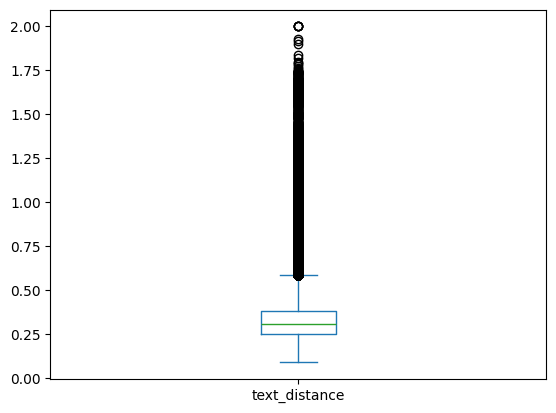

In [7]:
# plot the box plot of text_distance
df["text_distance"].plot.box()

<Axes: ylabel='Frequency'>

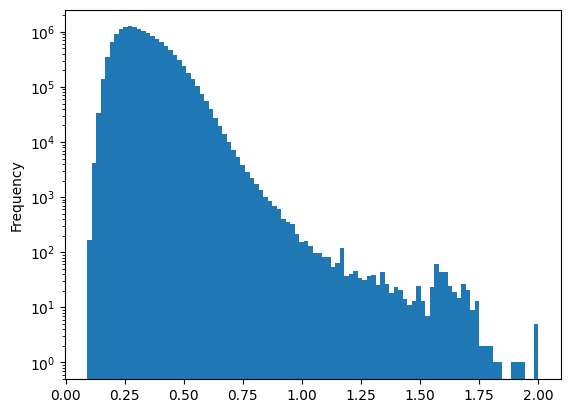

In [8]:
# plot the histogram of text_distance on a log scale
df["text_distance"].plot.hist(logy=True, bins=100)

In [9]:
#order df by text_distance descending
df = df.sort_values(by="text_distance", ascending=False)

## Question

- Where should we put the cutoff to remove "dirty" texts?

In [10]:
offset = 50_000
for i in range(100):
    print(df.iloc[i+offset]["text"])
    print(df.iloc[i+offset]["text_distance"])
    print()

Feng Zhe, (; * 1920 in Tianjin oder 1921 in Hainan als "Feng Yizhe" ; † 2. Juni 1969) war ein chinesischer Schauspieler.
0.6698421447280607

Nach der Verstaatlichung 1884 kamen sie zu den k.k. österreichischen Staatsbahnen (kkStB); die 31–47 wurden zunächst kkStB 10.01–09, dann 1891 kkStB 22.11–19 und schließlich 1904 122.11–19.
0.6698415254895317

<onlyinclude>* Moritz Brückner (Landrat) ("Ernst Moritz Karl Brückner"; 1807–1887), deutscher Verwaltungsjurist und Politiker
0.6698391603716991

Das Ehepaar Binder hatte drei Kinder Oscar (* 1832 Sulz am Neckar), Fanny (* 1836 Sulz am Neckar) und Clara (* 1841 Ludwigsburg).
0.6698359934634563

Seit 2012 gibt es eine Mixed-Senior-Flag-Football-Mannschaft (ab 16 Jahren), die in der NRW-Flag-Football-Liga und der Deutschen Flag-Football-Liga (DFFL) antritt.
0.6698354920521385

Sanballat III. (hebräisch , babylonisch Sin-uballit; † 332 v. Chr.) war ein persischer Statthalter (Satrap) von Samarien.
0.6698312203017686

Die angrenzenden Gemeinden 

## Conclusion:

- we use 0.67 as a threshold for text_distance and remove all that is greater
- remove all that is greater

In [11]:
dirty_wiki_ids = df[df["text_distance"] > 0.67]["wiki_id"].unique()
len(dirty_wiki_ids)

44748

In [12]:
# remove "dirty" wiki_ids from df
df = df[~df["wiki_id"].isin(dirty_wiki_ids)]
df

,id,title,text,url,wiki_id,views,paragraph_id,langs,text_distance
3180087,3180087,Grube Anna,Nach dem Zweiten Weltkrieg stieg die Förderung...,https://de.wikipedia.org/wiki?curid=119732,119732,163.171616,15,1,0.669998
14184531,14184531,Isidoro Carini,Isidoro Carini (* 7. Januar 1843 in Palermo; †...,https://de.wikipedia.org/wiki?curid=8116081,8116081,0.693147,0,3,0.669998
3939080,3939080,Horgau,1862 bis 1929 gehörte Horgau zum Bezirksamt Zu...,https://de.wikipedia.org/wiki?curid=466895,466895,107.911201,10,36,0.669998
7727609,7727609,Lamont Johnson (Regisseur),Danach drehte er als Regisseur Episoden für di...,https://de.wikipedia.org/wiki?curid=5848859,5848859,19.931370,3,15,0.669997
12764512,12764512,Lee Castle,Lee Castle (* 28. Februar 1915 in New York Cit...,https://de.wikipedia.org/wiki?curid=4716640,4716640,2.484907,0,4,0.669996
...,...,...,...,...,...,...,...,...,...
1938136,1938136,Fußball in London,Der Tottenham Hotspur FC wurde 1882 von jungen...,https://de.wikipedia.org/wiki?curid=9504218,9504218,348.901825,6,8,0.094879
6392992,6392992,Jakob Sigle,Bei seinen Reisen nach Amerika ab 1900 informi...,https://de.wikipedia.org/wiki?curid=9622860,9622860,34.508080,3,0,0.094291
9540017,9540017,Justus Siebein,Mit nur noch knapp 10.000 kampffähigen Soldate...,https://de.wikipedia.org/wiki?curid=4217097,4217097,9.821843,10,0,0.092346
4717732,4717732,Krazy Kat,Kommerziell gesehen gehörte Herrimans Strip ni...,https://de.wikipedia.org/wiki?curid=273569,273569,73.122513,7,18,0.092124


In [13]:
relevant_wiki_pages = pd.read_csv("./data/wikipedia_pages_it2.tsv.gz", sep="\t")
relevant_pageids = set(relevant_wiki_pages["pageid"].tolist())
len(relevant_pageids)

24014

In [14]:
relevant_wiki_pages = pd.read_csv("./data/wp_Digitale_Welt.tsv", sep="\t")
relevant_pageids.update(relevant_wiki_pages["pageid"].tolist())
len(relevant_pageids)

73491

In [15]:
# select some "other" page ids
other_pageids = list(set(df["wiki_id"].tolist()) - relevant_pageids)
random.shuffle(other_pageids)
other_pageids = other_pageids[:len(relevant_pageids)]
len(other_pageids)

73491

In [16]:
# add the "other" page ids to the relevant page ids
relevant_pageids.update(other_pageids)
len(relevant_pageids)

146982

In [17]:
df_selected = df[df["wiki_id"].isin(relevant_pageids)].copy()
df_selected

,id,title,text,url,wiki_id,views,paragraph_id,langs,text_distance
6983787,6983787,Friedrich Stromeyer,Er heiratete Luise Ludewig (* 29. September 17...,https://de.wikipedia.org/wiki?curid=784611,784611,26.980623,5,21,0.669988
13332431,13332431,Siddiqiy Ajziy,"Saidahmad Siddiqiy (auch ""Saidahmadxoʻja""; kyr...",https://de.wikipedia.org/wiki?curid=5871091,5871091,1.791759,0,3,0.669982
3440127,3440127,"7,5-cm-Leichtgeschütz 40","Das 7,5-cm-Leichtgeschütz 40 (kurz ""LG 40"") wa...",https://de.wikipedia.org/wiki?curid=5365282,5365282,141.204010,0,12,0.669980
13755596,13755596,Tiberius Claudius Claudianus,<onlyinclude>* Tiberius Claudius Claudianus (S...,https://de.wikipedia.org/wiki?curid=12114918,12114918,1.386294,0,0,0.669959
8987544,8987544,Gmina Stargard,Weitere Ortschaften in der Gemeinde sind Bębni...,https://de.wikipedia.org/wiki?curid=7596131,7596131,12.188967,2,15,0.669884
...,...,...,...,...,...,...,...,...,...
7250546,7250546,Rigomagus,Nach dem Bataveraufstand und den Wirren des Vi...,https://de.wikipedia.org/wiki?curid=5517172,5517172,24.143497,8,2,0.107323
2057137,2057137,Paul Ryan (Politiker),"In seinem ersten Versuch, in den Vereinigten S...",https://de.wikipedia.org/wiki?curid=5589493,5589493,323.148621,11,50,0.105903
1280074,1280074,Hacker (Computersicherheit),1988 schreibt Robert Tappan Morris aus Neugier...,https://de.wikipedia.org/wiki?curid=1661063,1661063,550.451416,18,26,0.105857
14410373,14410373,Anna Margarethe van Delden,Anna Margarete van Delden wurde am 10. Dezembe...,https://de.wikipedia.org/wiki?curid=11669155,11669155,0.693147,1,0,0.103976


In [18]:
df_selected.drop("url", axis=1, inplace=True)
df_selected.drop("views", axis=1, inplace=True)
df_selected.drop("langs", axis=1, inplace=True)
df_selected.drop("text_distance", axis=1, inplace=True)
df_selected

,id,title,text,wiki_id,paragraph_id
6983787,6983787,Friedrich Stromeyer,Er heiratete Luise Ludewig (* 29. September 17...,784611,5
13332431,13332431,Siddiqiy Ajziy,"Saidahmad Siddiqiy (auch ""Saidahmadxoʻja""; kyr...",5871091,0
3440127,3440127,"7,5-cm-Leichtgeschütz 40","Das 7,5-cm-Leichtgeschütz 40 (kurz ""LG 40"") wa...",5365282,0
13755596,13755596,Tiberius Claudius Claudianus,<onlyinclude>* Tiberius Claudius Claudianus (S...,12114918,0
8987544,8987544,Gmina Stargard,Weitere Ortschaften in der Gemeinde sind Bębni...,7596131,2
...,...,...,...,...,...
7250546,7250546,Rigomagus,Nach dem Bataveraufstand und den Wirren des Vi...,5517172,8
2057137,2057137,Paul Ryan (Politiker),"In seinem ersten Versuch, in den Vereinigten S...",5589493,11
1280074,1280074,Hacker (Computersicherheit),1988 schreibt Robert Tappan Morris aus Neugier...,1661063,18
14410373,14410373,Anna Margarethe van Delden,Anna Margarete van Delden wurde am 10. Dezembe...,11669155,1


In [19]:
df_selected.to_pickle("./data/wikipedia-22-12-de-no-emb-clean-selected.pkl.gz", compression="gzip")